In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data')
df

In [4]:
df_user = pd.read_csv('data')
df_user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [50]:
df_rating = pd.read_csv('data')
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [6]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [7]:
df_rating.isna().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [51]:
df_rating['User-ID'] = pd.Categorical(df_rating['User-ID'])
df_rating['new_user'] = df_rating['User-ID'].cat.codes
df_rating

,User-ID,ISBN,Book-Rating,new_user
0,276725,034545104X,0,104433
1,276726,0155061224,5,104434
2,276727,0446520802,0,104435
3,276729,052165615X,3,104436
4,276729,0521795028,6,104436
...,...,...,...,...
1149775,276704,1563526298,9,104428
1149776,276706,0679447156,0,104429
1149777,276709,0515107662,10,104430
1149778,276721,0590442449,10,104431


In [52]:
df_rating['ISBN'] = pd.Categorical(df_rating['ISBN'])
df_rating['new_ISBN'] = df_rating['ISBN'].cat.codes
df_rating

,User-ID,ISBN,Book-Rating,new_user,new_ISBN
0,276725,034545104X,0,104433,57188
1,276726,0155061224,5,104434,29750
2,276727,0446520802,0,104435,107392
3,276729,052165615X,3,104436,127253
4,276729,0521795028,6,104436,127287
...,...,...,...,...,...
1149775,276704,1563526298,9,104428,256876
1149776,276706,0679447156,0,104429,164861
1149777,276709,0515107662,10,104430,123711
1149778,276721,0590442449,10,104431,145625


In [53]:
user_idx = df_rating['new_user'].values
book_idx = df_rating['new_ISBN'].values
ratings = df_rating['Book-Rating'].values

In [54]:
N = len(set(user_idx))
M = len(set(book_idx))
K = 10

In [28]:
# import math

# def divisors(n):
#     divs = [1]
#     for i in range(2,int(math.sqrt(n))+1):
#         if n%i == 0:
#             divs.extend([i,n/i])
#     divs.extend([n])
#     return list(set(divs))

In [41]:
# math.gcd()

1

In [60]:
user_idx, book_idx, ratings = shuffle(user_idx, book_idx, ratings)

ntrain = int(0.8 *len(ratings))

train_user = user_idx[:ntrain]
train_book = book_idx[:ntrain]
train_ratings = ratings[:ntrain]

test_user = user_idx[ntrain:]
test_book = book_idx[ntrain:]
test_ratings = ratings[ntrain:]

# ratings_avg = ratings.mean()
# train_ratings = train_ratings - ratings_avg
# test_ratings = test_ratings - ratings_avg

In [55]:
u = Input(shape=(1,))
m = Input(shape=(1,))

u_emb = Embedding(N, K)(u)
m_emb = Embedding(M, K)(m)

u_emb = Flatten()(u_emb)
m_emb = Flatten()(m_emb)

x = Concatenate()([u_emb, m_emb])
x = Dense(1024, activation='relu')(x)
x = Dense(1)(x)

model = Model(inputs=[u, m], outputs=x)
model.compile(loss='mse', optimizer=SGD(learning_rate=0.08, momentum=0.9))

In [61]:
r = model.fit(x=[train_user, train_book], y=train_ratings, epochs=10, batch_size=1024, validation_data=([test_user, test_book], test_ratings))

Epoch 1/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - loss: 5.4383 - val_loss: 5.4918
Epoch 2/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 3.5126 - val_loss: 5.9990
Epoch 3/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - loss: 2.9146 - val_loss: 6.4115
Epoch 4/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - loss: 2.6454 - val_loss: 6.6227
Epoch 5/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - loss: 2.4330 - val_loss: 7.0306
Epoch 6/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 2.2988 - val_loss: 6.9764
Epoch 7/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - loss: 2.1491 - val_loss: 7.2505
Epoch 8/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - loss: 2.0846 - val_loss: 7.6307
Epoch 9/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - loss: 2.0124 - val_loss: 7.5282
Epoch 10/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - loss: 1.9423 - val_loss: 7.6714


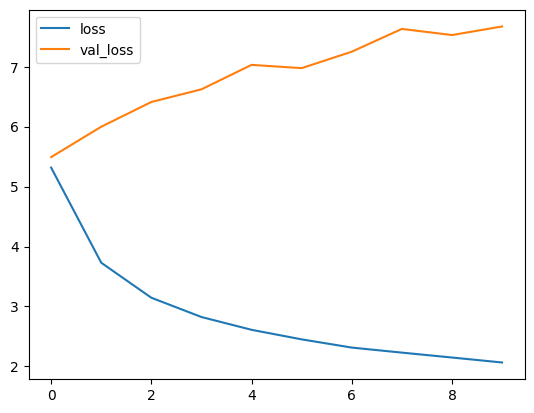

In [62]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [63]:
model.save('data')